# Average Years In School Women Age 15-24

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>

<font color=#303F9F>This part of the project for "Investigating Country GDP and Education" will focus on the average years spent in school women aged 15 to 24. Choosing to investigage the top GDP/Capita countries above the mean.</font>
<p>
<li><font color=green>Luxembourg</li></font>
<li><font color=blue>Norway</li></font>
<li><font color=red>Denmark</li></font>
<li><font color=gold>Sweden</li></font>
<li><font color=#81D4FA>Australia</li></font>

<a id='wrangling'></a>
# Lets Do Some Wrangling and Oganizing.

<font color=#303F9F>We start by importing all of our necessary libraries and the data we want to analyze "mean_years_in_school_women_15_to_24_years.csv".</font>
<p>
<font color=#303F9F><li>Pandas to help us wrangle and organize our data</li></font>
<font color=#303F9F><li>Matplotlib to create beautiful visualizations</li></font>
<font color=#303F9F><li>Seaborn for visualization styling</li></font>
<font color=#303F9F><li>Numpy to help with scientific computing</li></font>


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Set Chartting Style
sns.set(style="whitegrid")

#Setting figure size for visuals
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9

#Average years in school women aged 15-24
df_women = pd.read_csv('mean_years_in_school_women_15_to_24_years.csv')

In [44]:
#Viewing the data from mean years in school Women aged 15-24
df_women.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.48,0.50,0.51,0.53,0.55,0.57,0.59,0.61,0.63,...,1.60,1.66,1.71,1.77,1.82,1.88,1.94,2.00,2.07,2.13
1,Albania,4.99,5.11,5.24,5.36,5.49,5.62,5.75,5.88,6.02,...,10.20,10.40,10.50,10.70,10.90,11.00,11.20,11.40,11.50,11.70
2,Algeria,3.61,3.71,3.82,3.93,4.04,4.15,4.27,4.39,4.51,...,8.78,8.94,9.11,9.28,9.45,9.62,9.78,9.95,10.10,10.30
3,Andorra,9.50,9.67,9.84,10.00,10.20,10.30,10.50,10.70,10.80,...,15.00,15.10,15.30,15.40,15.50,15.60,15.70,15.80,16.00,16.10
4,Angola,1.64,1.69,1.74,1.80,1.85,1.91,1.97,2.03,2.10,...,4.77,4.90,5.03,5.16,5.30,5.43,5.57,5.71,5.85,6.00


<font color=#303F9F>You’ll notice the use of “.head()” quite extensively this is just for saving space.</font>

In [45]:
#view records for samples & columns
df_women.shape

(187, 47)

In [46]:
#view duplicate records
df_women.duplicated().sum()

0

In [47]:
#Check null records
df_women.isnull().sum().head()

country    0
1970       0
1971       0
1972       0
1973       0
dtype: int64

<font color=#303F9F>We run into a problem with year being in the header. This makes it difficult to work with the data set. Luckily there is a function called “MELT” in the pandas library that will place all dates within a new column.</font>


In [48]:
#using padas melt function to organize the data the way I want it
women_education = pd.melt(df_women, id_vars=['country'],var_name='year', value_name='education')
women_education.head()

,country,year,education
0,Afghanistan,1970,0.48
1,Albania,1970,4.99
2,Algeria,1970,3.61
3,Andorra,1970,9.50
4,Angola,1970,1.64


In [49]:
#exploring the newly formed data
women_education.describe()

,education
count,8602.000000
mean,7.246902
std,3.448175
min,0.420000
25%,4.550000
50%,7.310000
75%,9.927500
max,16.100000


In [50]:
#view records for samples & columns
women_education.shape

(8602, 3)

In [51]:
#Check data types
women_education.dtypes

country       object
year          object
education    float64
dtype: object

In [52]:
#Check null records
women_education.isnull().sum().head()

country      0
year         0
education    0
dtype: int64

In [53]:
#view duplicate records
women_education.duplicated().sum()

0

<a id='eda'></a>

<font color=#303F9F>Running queries for our desired countries we are able to create a line chart visualization. </font>
<p>
<li><font color=green>Luxembourg</li></font>
<li><font color=blue>Norway</li></font>
<li><font color=red>Denmark</li></font>
<li><font color=gold>Sweden</li></font>
<li><font color=#81D4FA>Australia</li></font>

In [54]:
#Average years in school Women age 15-24 query in relation to GDP data
#se_edu_women = women_education.query('country.str.contains("Sweden")')
#au_edu_women = women_education.query('country.str.contains("Australia")')
#lux_edu_women = women_education.query('country.str.contains("Luxembourg")')
#no_edu_women = women_education.query('country.str.contains("Norway")')
#dk_edu_women = women_education.query('country.str.contains("Denmark")')

se_edu_women = women_education[women_education['country'].str.contains("Sweden")]
au_edu_women = women_education[women_education['country'].str.contains("Australia")]
lux_edu_women = women_education[women_education['country'].str.contains("Luxembourg")]
no_edu_women = women_education[women_education['country'].str.contains("Norway")]
dk_edu_women = women_education[women_education['country'].str.contains("Denmark")]

<font color=#303F9F>Create a visual reprsentation </font>

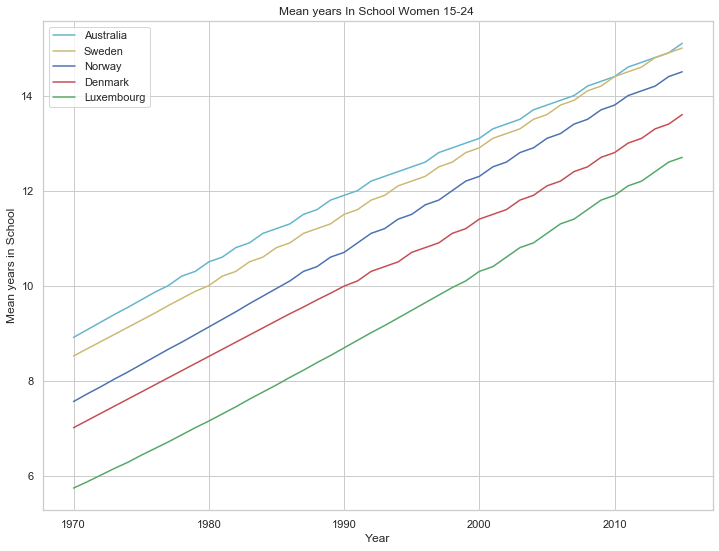

In [55]:
#Line plot for the countries selected.
def top_gdp_wschool():
    year = list(range(1970, 2016))
    se_edu = se_edu_women['education']
    au_edu = au_edu_women['education']
    lux_edu = lux_edu_women['education']
    no_edu = no_edu_women['education']
    dk_edu = dk_edu_women['education']

    plt.plot(year, au_edu, color='c', label='Australia')
    plt.plot(year, se_edu, color='y', label='Sweden')
    plt.plot(year, no_edu, color='b', label='Norway')
    plt.plot(year, dk_edu, color='r', label='Denmark')
    plt.plot(year, lux_edu, color='g', label='Luxembourg')
    
    plt.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Mean years in School')
    plt.title('Mean years In School Women 15-24 ')
    return plt.show()

top_gdp_wschool()
